In [1]:
#Connect to Omero

import ezomero
import numpy as np

#Step 1: Connect to Omero

HOST = 'ome2.hpc.sussex.ac.uk' #change if different
port = 4064
conn = ezomero.connect(user='rz200',password='omeroreset',group='',host=HOST,port=4064,secure=True)
if conn: print('Connection successful')
else: print('Unsuccessful')

Connection successful


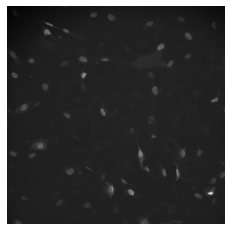

In [2]:
#Get one image
#Print all of its channels and download the pictures

import matplotlib.pyplot as plt

#Load the image IDs
plate = 822
image_ids = ezomero.get_image_ids(conn,plate=plate)
img = ezomero.get_image(conn,image_id=image_ids[0])[1][0][0]
img = (img - np.min(img)) / (np.max(img) - np.min(img))
#print(img)
plt.imshow(img[:,:,2],cmap='gray')
plt.axis('off')
plt.savefig('PCNA_channel_img')
plt.show()

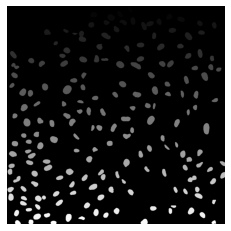

In [13]:
#Get the predicted mask and save it
from cellpose import models, io
model_dir = "C:\\Users\\rz200\\Documents\\Development\\cell-SCT\\segmentation\\demo_train_test_data\\data_for_masks_training\\models\\demo_model"
model = models.CellposeModel(gpu=True, pretrained_model=model_dir)
predicted_mask = model.eval([img], channels=[0,0], diameter=model.diam_labels.copy())[0][0]
plt.imshow(predicted_mask,cmap='gray')
plt.axis('off')
plt.savefig('predicted_mask')
plt.show()

In [ ]:
#Get the crops, don't save them we have to classify them first
from segmentation.seg_functions import *
import os
from PIL import Image

crop_coordinates = get_cell_crop_coordinates(predicted_mask)
crops = get_img_crops(img, crop_coordinates)
os.mkdir('C:\\Users\\rz200\\Documents\\Development\\cell-SCT\\crops_to_download')

#for i in range(len(crops)):
#im = Image.fromarray(A)
#im.save("your_file.jpeg")

In [ ]:
#Get the pandas dataframe
build_one_cell_df(image)
